**Assignment 6**

1.

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics

loc='/content/drive/MyDrive/Other-Material/'

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
mat=df.to_numpy()
#print(iris.DESCR)
print("Shape of matrix loaded:",mat.shape)
print("Number of Features:",mat.shape[1]-1)
print("Number of Patterns:",mat.shape[0])

Shape of matrix loaded: (150, 5)
Number of Features: 4
Number of Patterns: 150


In [ ]:
def pred_fn(X,w):
  x=X.dot(w)
  return 1/(1+np.exp(-x))
def  cal_cost(x,w,y):
    m = len(y)
    pred=pred_fn(x,w)
    cost = -np.sum(y.T.dot(np.log(pred))+(np.subtract(1,y)).T.dot(np.log(np.subtract(1,pred))))/m
    return cost
def gradient_descent(X,y,theta,learning_rate=0.001,iterations=100,p=0.005):
    m = len(y)
    j_hist=[]
    prev=-1
    cost=0
    for it in range(iterations):
        prediction = pred_fn(X,theta)
        theta = theta +(1/m)*learning_rate*( X.T.dot((y - prediction)))
        cost = cal_cost(X,theta,y)
        #cost2 = metrics.log_loss(y,prediction)
        #print(cost,cost2)
        j_hist.append(cost)
        if abs(cost-prev)<p:
          break
        prev=cost  
    return j_hist,theta
alpha=[0.1,0.05,0.01,0.05,0.001]
rho=[0.5,0.2,0.05,0.01,0.005]
epoch=[10,100,200,300,500]
alpha=[0.5]
epoch=[60000]
a=0

i)

In [ ]:
np.random.shuffle(mat)  
X=mat[:,:-1]
X = preprocessing.normalize(X)
X=np.column_stack((np.ones(X.shape[0]),X))
Y=mat[:,-1]
Y=Y.reshape(mat.shape[0],1)
train_size=int(X.shape[0]*0.4)
val_size=int(X.shape[0]*0.2)
X_train,Y_train=X[0:train_size,:],Y[0:train_size,:]
X_val,Y_val=X[train_size:train_size+val_size,:],Y[train_size:train_size+val_size,:]
X_test,Y_test=X[train_size+val_size:,:],Y[train_size+val_size:,:]
print(X.shape,Y.shape)
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)
print(X_test.shape,Y_test.shape)

(150, 5) (150, 1)
(60, 5) (60, 1)
(30, 5) (30, 1)
(60, 5) (60, 1)


ii)

In [ ]:
w_ori= np.random.randn(X_val.shape[1],1)
hp=np.zeros(shape=(len(alpha)))
for a in range(len(alpha)):
  j_val=[]
  for i in range(3):
    Y_val_i=Y_val.copy()
    for i2 in range(len(Y_val_i)):
      Y_val_i[i2]=1 if Y_val_i[i2]==i else 0
    j,w=gradient_descent(X_val,Y_val_i,w_ori.copy(),alpha[a],epoch[a],0)
    hp[a]+=j[-1]
    
print(hp)
hp_min=min(hp)
best, = np.where(np.isclose(hp, hp_min))
best_param = best[0]
print('Best values are at:',best_param)

[0.44772949]
Best values are at: 0


iii)

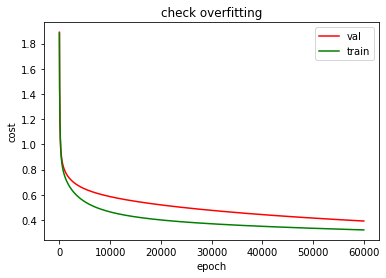

In [ ]:
alpha=[0.8]
epoch=[60000]
w_ori= np.random.randn(X.shape[1],1)
j_val=[]
j_train=[]
for i in range(3):
  Y_val_i=Y_val.copy()
  for i2 in range(len(Y_val_i)):
    Y_val_i[i2]=1 if Y_val_i[i2]==i else 0
  j,w=gradient_descent(X_val,Y_val_i,w_ori.copy(),alpha[a],epoch[a],0)
  j_val.append(j)
for i in range(3):
  Y_train_i=Y_train.copy()
  for i2 in range(len(Y_train_i)):
    Y_train_i[i2]=1 if Y_train_i[i2]==i else 0
  j,w=gradient_descent(X_train,Y_train_i,w_ori.copy(),alpha[a],epoch[a],0)
  j_train.append(j)
jt=np.zeros(epoch[a])
jv=np.zeros(epoch[a])
for i in range(epoch[a]):
  jv[i]=j_val[0][i]+j_val[1][i]+j_val[2][i]
  jt[i]=j_train[0][i]+j_train[1][i]+j_train[2][i]

itr=np.arange(1,epoch[a]+1,1)
plt.plot(itr, jv, color='r', label='val')
plt.plot(itr, jt, color='g', label='train')
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("check overfitting")
plt.legend()
plt.show()

iv)

In [ ]:
train_size_div=[0.2,0.4,0.6,0.8]
for ts in train_size_div:
  train_size=int(X.shape[0]*ts)
  X_train,Y_train=X[0:train_size,:],Y[0:train_size,:]
  X_test,Y_test=X[train_size:,:],Y[train_size:,:]
  print(X_train.shape,Y_train.shape)
  print(X_test.shape,Y_test.shape)
  
  w_all=[]
  acc=[0,0]
  for i in range(3):
    Y_train_i=Y_train.copy()
    for i2 in range(len(Y_train_i)):
      Y_train_i[i2]=1 if Y_train_i[i2]==i else 0
    j,w=gradient_descent(X_train,Y_train_i,w_ori.copy(),alpha[a],epoch[a],0)
    w_all.append(w)
  
  predictions=[]
  for w in w_all:
    predictions.append(pred_fn(X_train,w))
  correct=0
  for i in range(len(Y_train)):
    prediction=np.zeros(shape=3)
    prediction[0] = predictions[0][i]
    prediction[1] = predictions[1][i];
    prediction[2] = predictions[2][i]
    maxp=max(prediction)
    best, = np.where(np.isclose(prediction, maxp))
    pred=1 if best[0]>=0/5 else 0
    if pred==Y_train[i]:
      correct+=1
  acc[0]=100*correct*1.0/len(Y_train) 

  predictions=[]
  for w in w_all:
    predictions.append(pred_fn(X_test,w))
  correct=0
  for i in range(len(Y_test)):
    prediction=np.zeros(shape=3)
    prediction[0] = predictions[0][i]
    prediction[1] = predictions[1][i];
    prediction[2] = predictions[2][i]
    maxp=max(prediction)
    best, = np.where(np.isclose(prediction, maxp))
    pred=1 if best[0]>=0/5 else 0
    if pred==Y_test[i]:
      correct+=1
  acc[1]=100*correct*1.0/len(Y_test) 
  print(acc)



(30, 5) (30, 1)
(120, 5) (120, 1)
[30.0, 34.166666666666664]
(60, 5) (60, 1)
(90, 5) (90, 1)
[28.333333333333332, 36.666666666666664]
(90, 5) (90, 1)
(60, 5) (60, 1)
[27.77777777777778, 41.666666666666664]
(120, 5) (120, 1)
(30, 5) (30, 1)
[30.833333333333332, 43.333333333333336]


In [ ]:
predictions=[]
for i in range(3):
  Y_train_i=Y_train.copy()
  for i2 in range(len(Y_train_i)):
    Y_train_i[i2]=1 if Y_train_i[i2]==i else 0
  w_ori= np.random.randn(X.shape[1],1)
  j,w=gradient_descent(X_train,Y_train_i,w_ori,alpha[a],epoch[a],rho[a])
  predictions.append(pred_fn(X_test,w))
correct=0
for i in range(len(Y_test)):
  prediction=np.zeros(shape=3)
  prediction[0] = predictions[0][i]
  prediction[1] = predictions[1][i]
  prediction[2]=predictions[2][i]
  maxp=max(prediction)
  best, = np.where(np.isclose(prediction, maxp))
  pred= best[0]
  if pred==Y_test[i]:
    correct+=1
print(100*correct*1.0/len(Y_test))

63.333333333333336


In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train.T.ravel())
print("test",100*logisticRegr.score(X_test,Y_test.T.ravel()))


test 70.0
